# Problem Description
RMC, Inc., is a small firm that produces a variety of chemical products. In their production process, three materials are mixed together and heated to 300 degrees farenheight to produce two products: a fuel additive and a solvent base. Each ton of fuel additive is a mixture of 0.4 tons of material 1 and 0.6 tons of material 3. A ton of solvent base is a mixture of 0.5 tons of material 1, 0.2 tons of  material 2, and 0.3 tons of material 3. After deducting relevant costs, the profit contribution is 40 dollars for every ton of fuel additive produced and 38 dollars for every ton of solvent base produced. 

RMC has two mixing units available for production of fuel additive and solvent base. These mixers operate 6 hours a shift, two shifts a day, Monday through Friday. Both units can mix solvent base or fuel additive. The newer mixer 1 rate is faster than that of the older mixer 2 unit. 

While materials 1 and 2 are procured from vendors, material 3 is an itermediate material which is a stabilized version of material 4. RMC has one flashing unit available to produce material 3 from material 4. The flashing unit operates by heating material 4 and then flashing it under pressure to remove volatile compounds and stabilize the material.The volatile compounds are a byproduct, and RMC pays a small fee for a local power generation facility to incinerate this gas in accordance with local environmental regulations. The flashing unit operates 6 hours a shift, two shifts a day, Monday through Friday.

The planning deparment it working to determine the production plan for the coming week provided the current pricing, current availability of raw materials, and existing equipment capacities.

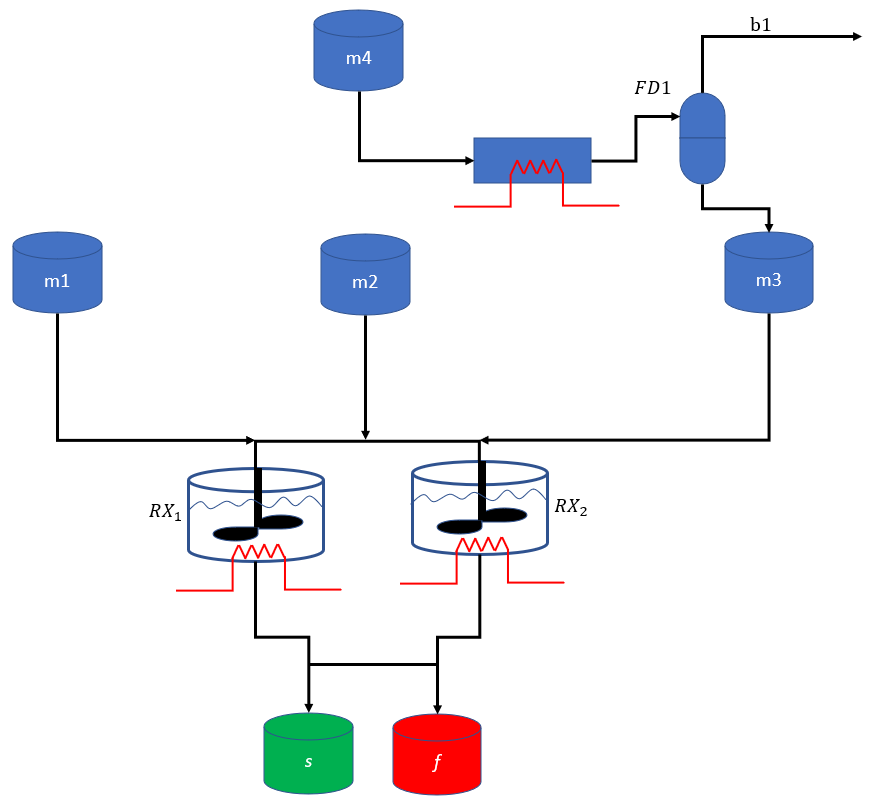

# Problem Definition
* Solvent base generates a profit of 38 dollars per ton and fuel additive generates a profit of 40 dollars per ton. 
* One ton of solvent base requires 0.5 tons of Material 1, 0.2 tons of Material 2, and 0.3 tons of Material 3. 
* One ton of fuel additive requires 0.4 tons of Material 1 and 0.6 tons of Material 3.
* Profits are maximized for a single period. No multiperiod sales are considered. 
* Raw material availability is limited to 30 tons of Material 1 and 5 tons of Material 2.
* Material 3 can be produced at 0.2 tons/hr, and current inventory is at 10 tons. 
* The yield loss for stabilizing material 4 is 0.1% by weight. 
* The mixer 1 production rates for solvent base and fuel additive are 0.65 tons/hour and 0.5 tons/hour, respectively.
* The mixer 2 production rates for solvent base and fuel additive are 0.6 tons/hour and 0.45 tons/hour, respectively.
* The total production time available for mixer 1, mixer 2, and flashing unit 1 is 60 hours each. 
* Additional material is not available for purchase.
* Additional operating time for each process is not available due to manpower/scheduling. 

# Opportunity Statement
Maximize profit by determining how much of each product, solvent base and fuel additive, to produce within existing equipment capacity and with the raw materials available. 

# Model Development

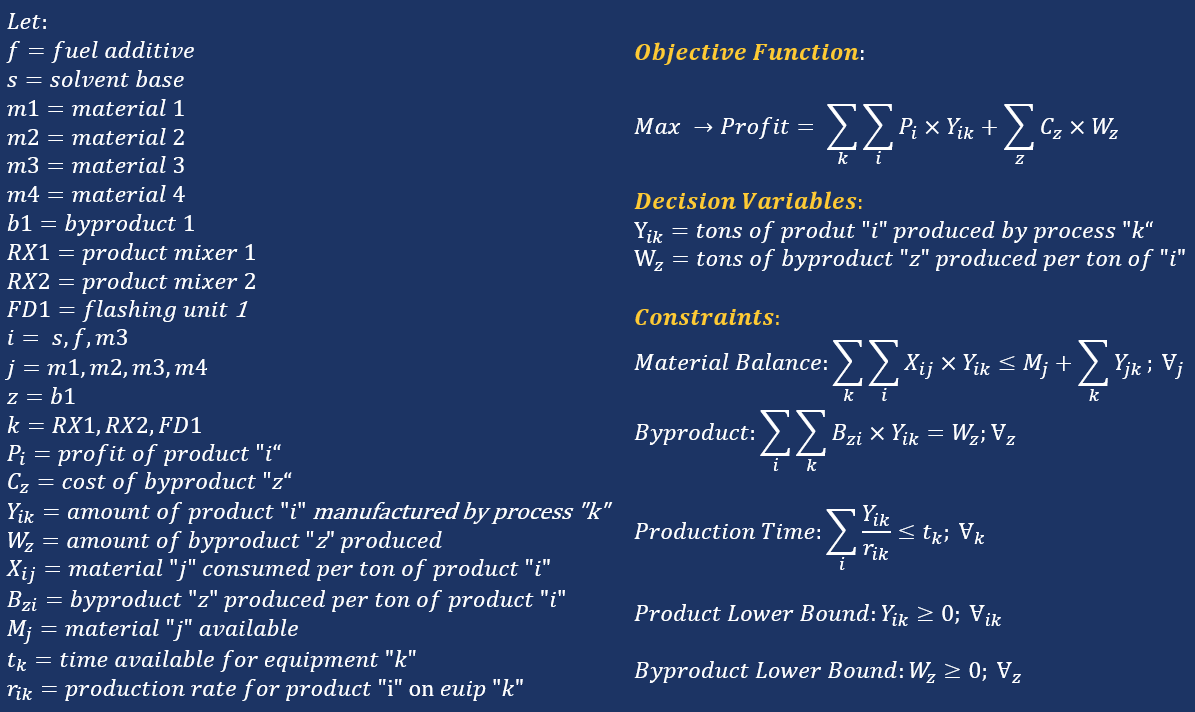

In [1]:
import pandas as pd
import pulp

In [2]:
#read in data
dfProducts = pd.read_excel("3_2_Data.xlsx","Products")
dfByProducts = pd.read_excel("3_2_Data.xlsx","Byproducts")
dfMaterials= pd.read_excel("3_2_Data.xlsx","Materials")
dfRecipe= pd.read_excel("3_2_Data.xlsx","Recipe")
dfUnitRate= pd.read_excel("3_2_Data.xlsx","Unit_Rate")
dfUnitCapacity= pd.read_excel("3_2_Data.xlsx","Unit_Capacity")

In [3]:
dfProducts

,Product,Price
0,s,38
1,f,40
2,m3,0


In [4]:
dfByProducts

,ByProduct,Cost
0,b1,-0.01


In [5]:
dfMaterials

,Material,Available
0,m1,30
1,m2,5
2,m3,10
3,m4,50


In [6]:
dfYield=dfRecipe[dfRecipe['Cons']<0]
dfYield

,Product,Material,Cons
12,m3,b1,-0.001


In [7]:
dfRecipe=dfRecipe[dfRecipe['Cons']>=0]
dfRecipe

,Product,Material,Cons
0,s,m1,0.500
1,s,m2,0.200
2,s,m3,0.300
3,s,m4,0.000
4,f,m1,0.400
5,f,m2,0.000
6,f,m3,0.600
7,f,m4,0.000
8,m3,m1,0.000
9,m3,m2,0.000


In [8]:
dfUnitRate

,Unit,Product,Rate,Notes
0,RX1,s,0.65,NaN
1,RX1,f,0.50,NaN
2,RX2,s,0.60,NaN
3,RX2,f,0.45,NaN
4,FD1,m3,0.20,NaN
5,FD2,m3,0.20,Strategic study consideration


In [9]:
dfUnitCapacity

,Unit,Time,Notes
0,RX1,60,NaN
1,RX2,60,NaN
2,FD1,60,NaN
3,FD2,0,Strategic study consideration


In [10]:
#define input parameter values
products=list(dfProducts['Product'].unique())
byproducts=list(dfYield['Material'].unique())
materials=list(dfMaterials['Material'].unique())
units=list(dfUnitCapacity['Unit'].unique())

X={}
for p in products:
    X[p]=dict(zip(materials,[0]*len(materials)))
for i in dfRecipe.index:
    X[dfRecipe.loc[i,'Product']][dfRecipe.loc[i,'Material']]=dfRecipe.loc[i,'Cons']

M=dict(zip(materials,[0]*len(materials)))
for i in dfMaterials.index:
    M[dfMaterials.loc[i,'Material']]=dfMaterials.loc[i,'Available']
    
P=dict(zip(products,[0]*len(products)))
for i in dfProducts.index:
    P[dfProducts.loc[i,'Product']]=dfProducts.loc[i,'Price']
    
r={}
for p in products:
    rates=dfUnitRate['Product'][dfUnitRate['Unit']==p].tolist()
    r[p]=dict(zip(rates,[0]*len(rates)))
for i in dfUnitRate.index:
    r[dfUnitRate.loc[i,'Product']][dfUnitRate.loc[i,'Unit']]=dfUnitRate.loc[i,'Rate']
    
t=dict(zip(units,[0]*len(units)))
for i in dfUnitCapacity.index:
    t[dfUnitCapacity.loc[i,'Unit']]=dfUnitCapacity.loc[i,'Time']
    
B={}
for b in byproducts:
    sources=dfYield['Product'][dfYield['Material']==b].tolist()
    B[b]=dict(zip(sources,[0]*len(sources)))
for i in dfYield.index:
    B[dfYield.loc[i,'Material']][dfYield.loc[i,'Product']]=-dfYield.loc[i,'Cons']

C=dict(zip(byproducts,[0]*len(byproducts)))
for i in dfByProducts.index:
    C[dfByProducts.loc[i,'ByProduct']]=dfByProducts.loc[i,'Cost']

In [11]:
X

{'s': {'m1': 0.5, 'm2': 0.2, 'm3': 0.3, 'm4': 0.0},
 'f': {'m1': 0.4, 'm2': 0.0, 'm3': 0.6, 'm4': 0.0},
 'm3': {'m1': 0.0, 'm2': 0.0, 'm3': 0.0, 'm4': 0.999}}

In [12]:
M

{'m1': 30, 'm2': 5, 'm3': 10, 'm4': 50}

In [13]:
P

{'s': 38, 'f': 40, 'm3': 0}

In [14]:
r

{'s': {'RX1': 0.65, 'RX2': 0.6},
 'f': {'RX1': 0.5, 'RX2': 0.45},
 'm3': {'FD1': 0.2, 'FD2': 0.2}}

In [15]:
t

{'RX1': 60, 'RX2': 60, 'FD1': 60, 'FD2': 0}

In [16]:
B

{'b1': {'m3': 0.001}}

In [17]:
C

{'b1': -0.01}

## Build & Solve Model

In [18]:
#Step 1: Create Model Object
model = pulp.LpProblem("Production_Resourcing", pulp.LpMaximize)

In [19]:
#Step 2: Create Decision Variables
prd_index=[]
for i in dfUnitRate.index:
        prd_index.append((dfUnitRate.loc[i,'Product'],dfUnitRate.loc[i,'Unit']))

Y = pulp.LpVariable.dicts('Y', ((products,equip) for products, equip in prd_index), lowBound=0, cat='Continuous')
W = pulp.LpVariable.dicts('W', (byproducts), lowBound=0, cat='Continuous')
Y

{('s', 'RX1'): Y_('s',_'RX1'),
 ('f', 'RX1'): Y_('f',_'RX1'),
 ('s', 'RX2'): Y_('s',_'RX2'),
 ('f', 'RX2'): Y_('f',_'RX2'),
 ('m3', 'FD1'): Y_('m3',_'FD1'),
 ('m3', 'FD2'): Y_('m3',_'FD2')}

In [20]:
W

{'b1': W_b1}

In [21]:
#Step 3: Add Objective Function
obj_fxn = 0
obj_fxn += pulp.lpSum([Y[p,k]*P[p] for p,k in prd_index])
obj_fxn += pulp.lpSum([W[b]*C[b] for b in byproducts])
model += obj_fxn

In [22]:
#Step 4: Add Constraints

for m in materials:
    model += sum([X[p][m]*Y[p,k] for p, k in prd_index]) <= \
    M[m] + (sum([Y[m,k] for k in r[m].keys()]) if m in r.keys() else 0), 'Material Balance' +'_'+str(m)

for k in units:
    unit_prd=dfUnitRate['Product'][dfUnitRate['Unit']==k]
    model += sum([Y[p,k]*(1/r[p][k]) for p in unit_prd]) <= t[k], 'Production Time' +'_'+str(k)

for b in byproducts:
    byprd_index=[]
    for i in dfUnitRate[dfUnitRate['Product'].isin(list(B[b].keys()))].index:
            byprd_index.append((dfUnitRate.loc[i,'Product'],dfUnitRate.loc[i,'Unit']))
    model += sum([B[b][p]*Y[p,k] for p,k in byprd_index]) == W[b], 'Byproduct' +'_'+str(b)
    
#NOTE we did note at the non-negative production constraints here because we already specificied them in th e"lowBound" of the LpVariable class. 

In [23]:
#Step 5: Write the Model
model.writeLP("lp_model.lp")

[W_b1,
 Y_('f',_'RX1'),
 Y_('f',_'RX2'),
 Y_('m3',_'FD1'),
 Y_('m3',_'FD2'),
 Y_('s',_'RX1'),
 Y_('s',_'RX2')]

In [24]:
#Step 6: Solve Model
model.solve(pulp.PULP_CBC_CMD(msg=True, keepFiles=False))
pulp.LpStatus[model.status]

'Optimal'

## Evaluation & Sensitivity Analysis

In [25]:
# look at objective value
model.objective.value()

1916.6665600000001

In [26]:
#create data frame for df_var
df_var=pd.DataFrame()
lp_class=[]
var=[]
val=[]
rc=[]
for j in model.variables():
    lp_class.append('var')
    var.append(j)
    val.append(j.varValue)
    rc.append(j.dj)

df_var['class']=lp_class
df_var['name']=var
df_var['val']=val
df_var['rc']=rc

df_var

,class,name,val,rc
0,var,W_b1,0.012000,0.000000e+00
1,var,"Y_('f',_'RX1')",15.916667,0.000000e+00
2,var,"Y_('f',_'RX2')",8.250000,0.000000e+00
3,var,"Y_('m3',_'FD1')",12.000000,3.174136e-15
4,var,"Y_('m3',_'FD2')",0.000000,3.174136e-15
5,var,"Y_('s',_'RX1')",0.000000,3.552714e-15
6,var,"Y_('s',_'RX2')",25.000000,3.552714e-15


In [27]:
#create data frame for df_const
df_const=pd.DataFrame()
lp_class=[]
const=[]
val=[]
slack=[]
dv=[]
for j in model.constraints.items():
    lp_class.append('constraint')
    const.append(j[0])
    val.append(sum([var.varValue * coefficient for var, coefficient in j[1].items()]))
    slack.append(j[1].slack)
    dv.append(j[1].pi)

df_const['class']=lp_class
df_const['name']=const
df_const['val']=val
df_const['slack']=slack
df_const['dv']=dv

df_const

,class,name,val,slack,dv
0,constraint,Material_Balance_m1,22.166667,7.833333,-0.000000
1,constraint,Material_Balance_m2,5.000000,-0.000000,90.000000
2,constraint,Material_Balance_m3,10.000000,-0.000000,66.666667
3,constraint,Material_Balance_m4,11.988000,38.012000,-0.000000
4,constraint,Production_Time_RX1,31.833334,28.166667,-0.000000
5,constraint,Production_Time_RX2,60.000000,-0.000000,-0.000000
6,constraint,Production_Time_FD1,60.000000,-0.000000,13.333331
7,constraint,Production_Time_FD2,0.000000,-0.000000,13.333331
8,constraint,Byproduct_b1,0.000000,-0.000000,0.010000
